<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

## Box-Plots for Education

   The aim of the competition is to help schools correctly identify spending labels (previously done manually). As you will see in the next chapters, the project is a supervised multi-label multi-class classification problem where the resulting machine will present the most likely budget line items for any given new instance. The aim is to predict the probability that a certain label is attached to a budget line item. 

## 1. Preparation

First we will make sure the code will run on any version of Python, the kernel is able to plot the figures inline and to load the data into a dataframe.

In [1]:
# To be viable for Python 2 & 3
from __future__ import division, print_function, unicode_literals

# Common imports, standard procedure
import numpy as np

# To plot pretty figures in jupyter
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# To make the random generated output stable across runs
np.random.seed(42)

# Opening up a path to the datafiles and saving the data to a Dataframe
import os
import pandas as pd
notebook_path = os.path.abspath("Education_Python.ipynb")
train_csv = os.path.join(os.path.dirname(notebook_path), "TrainingData.csv")
test_csv = os.path.join(os.path.dirname(notebook_path), "TestData.csv")
with open(train_csv) as file:
    df = pd.read_csv(file, index_col=0)
with open(test_csv) as file:
    test_df = pd.read_csv(file, index_col=0)

# Checking the results
print('---------------------------------------------------------')
print('\t\tTraining Dataframe')
print('---------------------------------------------------------')
print(df.head(5))
print('---------------------------------------------------------')
print('\t\tTest Dataframe')
print('---------------------------------------------------------')
print(test_df.head(5))

---------------------------------------------------------
		Training Dataframe
---------------------------------------------------------
                       Function          Use          Sharing Reporting  \
134338     Teacher Compensation  Instruction  School Reported    School   
206341                 NO_LABEL     NO_LABEL         NO_LABEL  NO_LABEL   
326408     Teacher Compensation  Instruction  School Reported    School   
364634  Substitute Compensation  Instruction  School Reported    School   
47683   Substitute Compensation  Instruction  School Reported    School   

       Student_Type Position_Type               Object_Type     Pre_K  \
134338     NO_LABEL       Teacher                  NO_LABEL  NO_LABEL   
206341     NO_LABEL      NO_LABEL                  NO_LABEL  NO_LABEL   
326408  Unspecified       Teacher  Base Salary/Compensation  Non PreK   
364634  Unspecified    Substitute                  Benefits  NO_LABEL   
47683   Unspecified       Teacher   Substitute 

/Users/macbookair/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 2. Let's take a peek (EDA)

Now let's get our hands dirty with data. But first we would like to know what we are dealing with.


In [2]:
# Examine the shape and size
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 25 columns):
Function                  400277 non-null object
Use                       400277 non-null object
Sharing                   400277 non-null object
Reporting                 400277 non-null object
Student_Type              400277 non-null object
Position_Type             400277 non-null object
Object_Type               400277 non-null object
Pre_K                     400277 non-null object
Operating_Status          400277 non-null object
Object_Description        375493 non-null object
Text_2                    88217 non-null object
SubFund_Description       306855 non-null object
Job_Title_Description     292743 non-null object
Text_3                    109152 non-null object
Text_4                    53746 non-null object
Sub_Object_Description    91603 non-null object
Location_Description      162054 non-null object
FTE                       126071 non-null float64
Func

(400277, 25)

The dataset is mostly filled with object datatypes. We will later change most datatypes to categorical data for computational efficiency. Besides our rows filled with object data (most likely just strings of text), there are 2 float datattypes: FTE and Total. FTE is the the percentage of full-time work an employee engages in and Total contains the total costs of the noted expenditure. Lets take a look at the contents of the object columns and then inspect the numeric information FTE and Total provide.

In [3]:
# Print the summary statistics and valuecounts of the columns to look for any irregularities
print('---------------------------------------------------------')
print('\t\tDescribe')
print('---------------------------------------------------------')

print(df.describe())

print('---------------------------------------------------------')
print('\t\tValue Counts')
print('---------------------------------------------------------')

Columns = df.columns.tolist()
for c in Columns:
    print(df[c].value_counts())


---------------------------------------------------------
		Describe
---------------------------------------------------------
                 FTE         Total
count  126071.000000  3.957220e+05
mean        0.426794  1.310586e+04
std         0.573576  3.682254e+05
min        -0.087551 -8.746631e+07
25%         0.000792  7.379770e+01
50%         0.130927  4.612300e+02
75%         1.000000  3.652662e+03
max        46.800000  1.297000e+08
---------------------------------------------------------
		Value Counts
---------------------------------------------------------
Teacher Compensation                               86354
Substitute Compensation                            62215
NO_LABEL                                           59579
Aides Compensation                                 19858
Instructional Materials & Supplies                 19711
Facilities & Maintenance                           19617
Professional Development                           19102
Student Transportation      

GENERAL FUND                                   123327
Operations                                      26895
FEDERAL GDPG FUND - FY                          13562
Support Services - Instructional Staff          10238
Special Instruction                             10106
DISTRICT SPECIAL REVENUE FUNDS                   9975
LOCAL                                            9393
ARRA - STIMULUS                                  7458
Community Services                               7386
 MILL LEVY                                       5964
FOOD SERVICE FUND                                5810
MISCELLANEOUS                                    5649
"Title  Part A Improving Basic Programs"         5260
PRIMARY GRADES PROGRAM                           4379
ITEMGD PRESCHOOL PROGRAM                         3584
LEVY OVERRIDE                                    3267
Regular Instruction                              3071
Child Nutrition                                  2558
State Ed. Allotment         

1.000000    35788
0.000000    31338
0.004310     8130
0.002155     2735
0.008621     2293
0.025000     2020
0.500000     1825
0.012931      941
0.006466      712
0.017241      479
0.250000      398
0.750000      383
0.150000      366
0.200000      351
0.875000      341
0.010776      324
0.021552      308
0.940000      291
0.005435      279
0.710000      270
0.100000      269
0.880000      269
0.030000      263
0.850000      263
0.400000      249
0.001078      234
0.010000      229
0.730000      222
0.860000      216
0.025862      206
            ...  
0.916691        1
0.969435        1
0.073177        1
1.007043        1
0.280913        1
0.512168        1
0.319444        1
0.516327        1
0.116467        1
0.015808        1
0.019666        1
0.001315        1
0.085598        1
0.377023        1
0.651338        1
0.181825        1
0.126403        1
0.583349        1
1.000024        1
0.315342        1
0.491025        1
0.666537        1
1.000028        1
1.045128        1
0.916641  

GENERAL ELEMENTARY EDUCATION                                    32829
EMPLOYEE BENEFITS                                               32669
INSTRUCTIONAL STAFF TRAINING                                    21521
Undistributed                                                   18547
Instruction - Regular                                           13825
Misc                                                            13143
GENERAL HIGH SCHOOL EDUCATION                                   10625
Basic Educational Services                                      10593
"Title I, Part A Schoolwide Activities Related To State Comp     8520
GENERAL MIDDLE/JUNIOR HIGH SCH                                   7179
PRIMARY GRADES PROGRAM                                           5935
GENERAL K-8 EDUCATION                                            5907
FOOD PREPARATION/SERVING                                         5646
SUPPORT SERVICES-INSTRUCTIONAL                                   5564
SUPPORT SERVICES-SCH

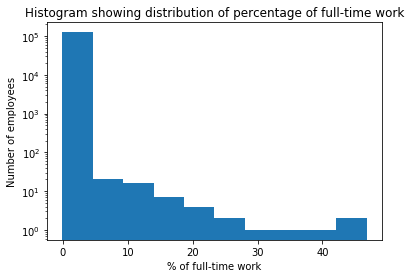

In [4]:
# Create the histogram of FTE
plt.hist(df['FTE'].dropna())
plt.title('Histogram showing distribution of percentage of full-time work')
plt.xlabel('% of full-time work')
plt.ylabel('Number of employees')
plt.yscale('log')
plt.show()

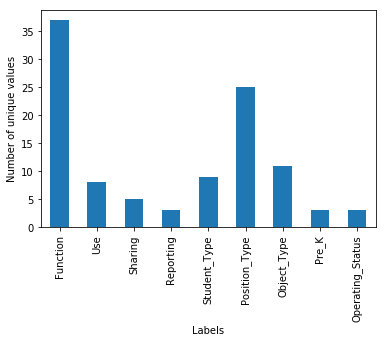

In [5]:
# Time to split the labels from the features, first we make a list containing all the labels:
LABELS = ['Function',
 'Use',
 'Sharing',
 'Reporting',
 'Student_Type',
 'Position_Type',
 'Object_Type',
 'Pre_K',
 'Operating_Status']

# changing the object datatypes to category
df[LABELS] = df[LABELS].apply(lambda x: x.astype('category'), axis=0)

# Calculate number of unique values for each label: num_unique_labels
unique_labels = df[LABELS].apply(pd.Series.nunique)

# Plot number of unique values for each label
unique_labels.plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Number of unique values')
plt.show()

In [6]:
# Importing external functions: Multilabel train/test/split, file can be found
# in the current directory under the names Multi.
import Multilabel

# Get the dummy encoding of the LABELS
dummy_LABELS = pd.get_dummies(df[LABELS])

# Get the columns that are features in the original df
NON_LABELS = [x for x in df.columns if x not in LABELS]

X_train, X_test, y_train, y_test = Multilabel.multilabel_train_test_split(df[NON_LABELS],
                                                               dummy_LABELS,
                                                               0.2)


In [ ]:
from sklearn import model_selection

# Imports pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion


# Import the different algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Import feature engineering tools
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.preprocessing import PolynomialFeatures

# Import preprocessing tools
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler

# Importing external class: SparseInteractions, file can be found
# in the current directory under the names Sparse.
import Sparse

# Creating Function for combining all text strings that aren't numeric predictors or labels
num_data = df.loc[:, ['FTE', 'Total']].fillna(-1000)
num_cols = num_data.columns.to_list()

def combine_text (data_frame, to_drop=num_cols + LABELS):
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis=1)
    text_data.fillna('', inplace=True)
    return text_data.apply(lambda x: " ".join(x), axis=1)

# Setting up FunctionTransformer for preprocessing the text and numerical data seperately
txtdata = FunctionTransformer(combine_text, validate=False)
numdata = FunctionTransformer(lambda x: x[num_cols], validate=False)

# 
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# setting the parameters for the chi squared test
chi_k = 300

# defining variables to be able to execute the 
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

results = []
names = []
scoring = 'accuracy'

# Pipeline: Preprocessing and Model execution
# evaluate each model in turn
for name, model in models:
    pl = Pipeline([
    ('union', FeatureUnion(
        transformer_list = [
            ('numeric_features', Pipeline([
                ('selector', numdata),
                ('imputer', SimpleImputer())
                ])),
            ('text_features', Pipeline([
                    ('selector', txtdata),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1,2))),
                    #('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
    #('int', PolynomialFeatures(degree=2)),
    ('scale', MaxAbsScaler()),
    ('clf', OneVsRestClassifier(model))
    ])
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(pl, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Comparing the algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


/Users/macbookair/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/macbookair/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
#%%time
#pl.fit(X_train, y_train)
#accuracy = pl.score(X_test, y_test)
#print(accuracy)


# Logistic
0.9170445318843296
CPU times: user 34min 54s, sys: 36.4 s, total: 35min 30s
Wall time: 19min

# Decision Tree
50%
10 min

# With both


In [ ]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')